Importing libraries

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q5.

5.i (Continuous Uniform, Exponential, Bernoulli, Custom Discrete)

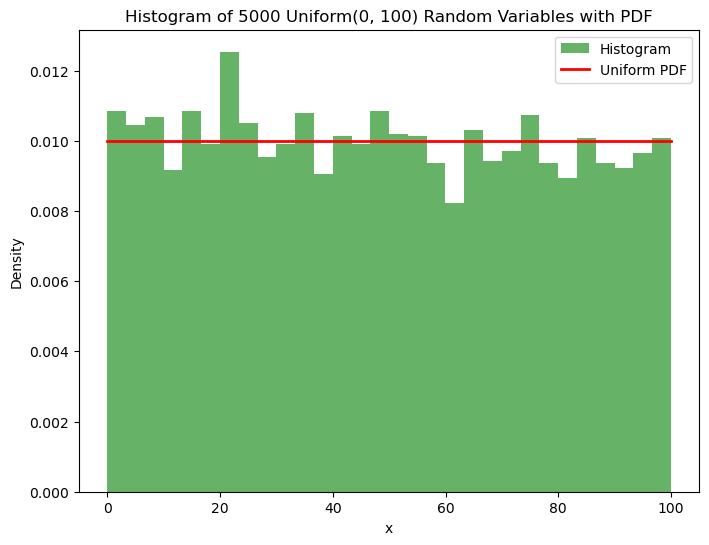

In [23]:
# continuous uniform distribution

def gen_uniform(a, b, num_samples):
    U = np.random.uniform(0, 1, num_samples)
    X = a + (b - a) * U
    return X

# params
a = 0
b = 100
samples = 5000
uniform_samples = gen_uniform(a, b, samples)

plt.figure(figsize=(8, 6))
plt.hist(uniform_samples, bins=30, density=True, alpha=0.6, color='g', label='Histogram')

x = np.linspace(a, b, 1000)
pdf = [1 / (b - a)] * len(x)
plt.plot(x, pdf, 'r-', lw=2, label='Uniform PDF')

plt.title(f'Histogram of 5000 Uniform({a}, {b}) Random Variables with PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

constant pdf: 1/(b-a)

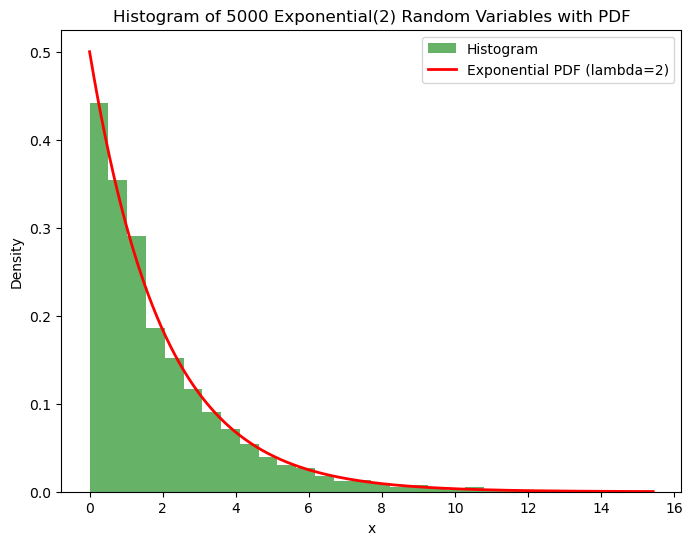

In [26]:
# exponential distribution

def generate_expo(lamb, num_samples):
    U = np.random.uniform(0, 1, num_samples)
    X = -lamb * np.log(U)
    return X

lamb = 2
samples = 5000
exp_samples = generate_expo(lamb, samples)

plt.figure(figsize=(8, 6))
plt.hist(exp_samples, bins=30, density=True, alpha=0.6, color='g', label='Histogram')

x = np.linspace(0, max(exp_samples), 1000)
pdf = (1/lamb) * np.exp(-x/lamb)
plt.plot(x, pdf, 'r-', lw=2, label=f'Exponential PDF (lambda={lamb})')

plt.title(f'Histogram of 5000 Exponential({lamb}) Random Variables with PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

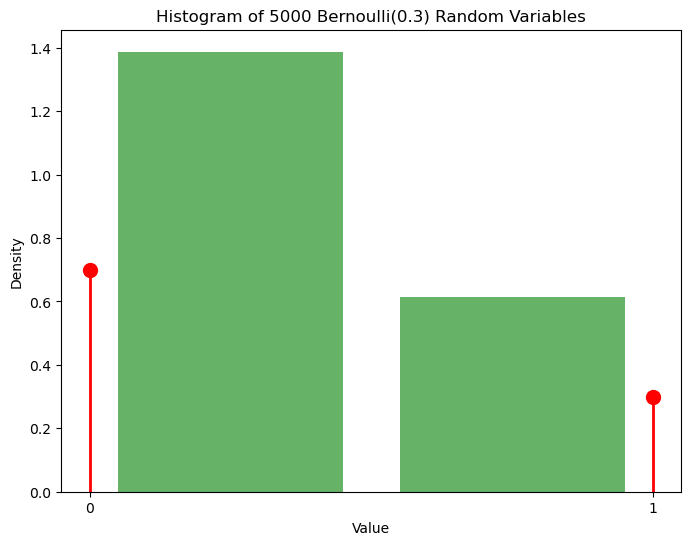

In [29]:
# bernoulli distribution

def gen_bernoulli(p, num_samples):
    U = np.random.uniform(0, 1, num_samples)
    X = np.where(U < (1 - p), 0, 1)
    return X

p = 0.3
samples = 5000
bernoulli_samples = gen_bernoulli(p, samples)

plt.figure(figsize=(8, 6))
plt.hist(bernoulli_samples, bins=2, density=True, alpha=0.6, color='g', rwidth=0.8)
x_values = [0, 1]
pmf_values = [1 - p, p]  # PMF values for Bernoulli(0,1)
plt.plot(x_values, pmf_values, 'ro', ms=10, label='Bernoulli PMF')
plt.vlines(x_values, 0, pmf_values, colors='r', linestyles='-', lw=2)
plt.xticks([0, 1])
plt.title(f'Histogram of 5000 Bernoulli({p}) Random Variables')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

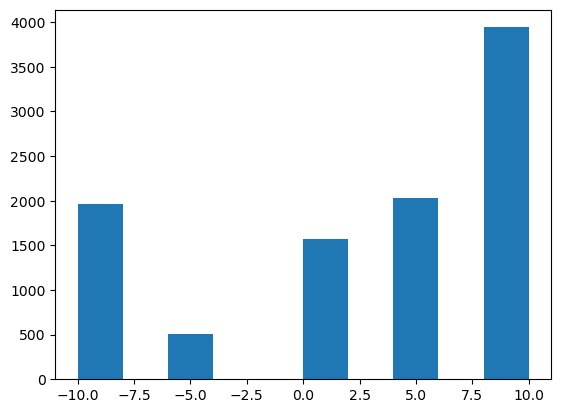

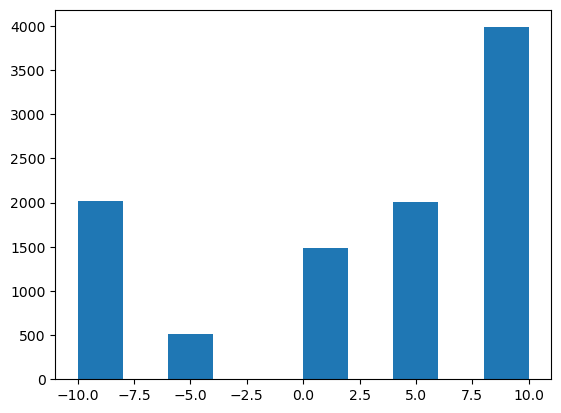

In [12]:
# custom distro

ss =  [-10, -5, 0, 5, 10] # support set
p = [0.2, 0.05, 0.15, 0.2, 0.4] # probabilities

X = stats.rv_discrete(values=(ss,p)).rvs(size=10000)
gX = stats.rv_discrete(values=(ss,p)).rvs(size=10000)
plt.hist(X); plt.show()
plt.hist(gX); plt.show()


5.ii (Poisson, Binomial, Gamma)

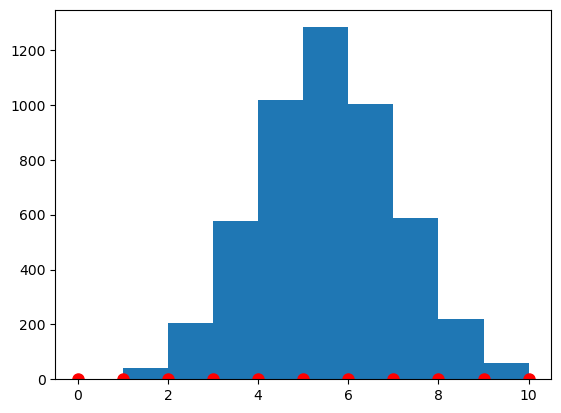

In [32]:
# binomial distribution - composition method

n = 10
p = 0.5
s = 5000

def gen_binomial(n,p,s):
    binomial_samples = []
    for _ in range(s):
        bernoulli_samples = stats.bernoulli.rvs(p,size=n)
        binomial_var = np.sum(bernoulli_samples)
        binomial_samples.append(binomial_var)

    return np.array(binomial_samples)

binomial_random_vars = gen_binomial(n,p,s)

# Superimpose the actual Binomial PMF
x = np.arange(0, n + 1)  # Possible outcomes for a binomial distribution (0 to n)
pmf_values = stats.binom.pmf(x, n, p)  # Binomial PMF values
plt.plot(x, pmf_values, 'ro', ms=8, label='Binomial PMF')
plt.vlines(x, 0, pmf_values, colors='r', lw=2)
plt.hist(binomial_random_vars); plt.show()


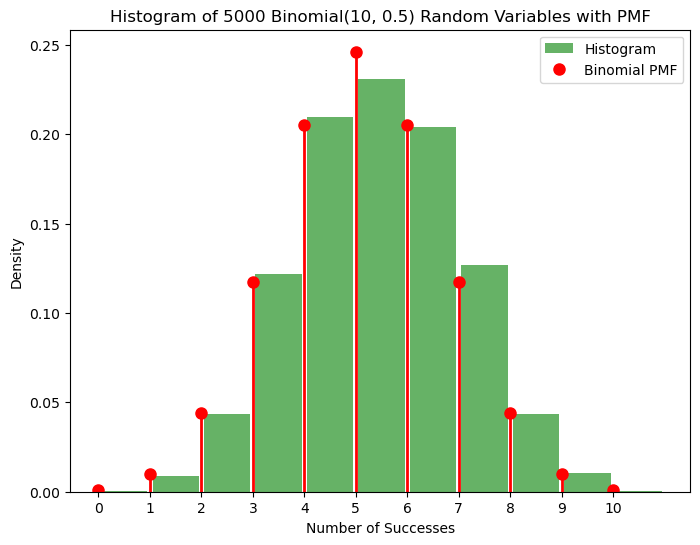

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
n = 10  # Number of trials
p = 0.5  # Probability of success
s = 5000  # Number of samples

# Function to generate binomial random variables using Bernoulli trials
def gen_binomial(n, p, s):
    binomial_samples = []
    for _ in range(s):
        # Generate n independent Bernoulli random variables
        bernoulli_samples = stats.bernoulli.rvs(p, size=n)
        # Sum the Bernoulli samples to get a binomial random variable
        binomial_var = np.sum(bernoulli_samples)
        binomial_samples.append(binomial_var)

    return np.array(binomial_samples)

# Generate 5000 binomial random variables
binomial_random_vars = gen_binomial(n, p, s)

# Plot the histogram of the generated binomial random variables
plt.figure(figsize=(8, 6))
plt.hist(binomial_random_vars, bins=range(n + 2), density=True, alpha=0.6, color='g', rwidth=0.9, label='Histogram')

# Superimpose the actual Binomial PMF
x = np.arange(0, n + 1)  # Possible outcomes for a binomial distribution (0 to n)
pmf_values = stats.binom.pmf(x, n, p)  # Binomial PMF values
plt.plot(x, pmf_values, 'ro', ms=8, label='Binomial PMF')
plt.vlines(x, 0, pmf_values, colors='r', lw=2)

# Adding labels, title, and legend
plt.title(f'Histogram of 5000 Binomial({n}, {p}) Random Variables with PMF')
plt.xlabel('Number of Successes')
plt.ylabel('Density')
plt.xticks(x)  # Ensure we see the binomial outcomes on x-axis
plt.legend()

# Show the plot
plt.show()

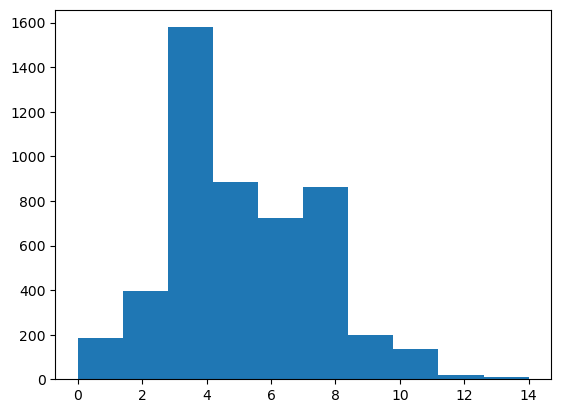

[2, 2, 2, 3, 5, 4, 7, 4, 5, 9]


In [15]:
# poisson distribution - composition method

def gen_poisson(lambd):
    T = 0
    n = 0
    while T < 1:
        tau = np.random.exponential(1/lambd)
        T += tau
        n += 1
    return n-1

lambd = 5
samples = 5000
poisson_random_vars = [gen_poisson(lambd) for _ in range(samples)]
plt.hist(poisson_random_vars); plt.show()
print(poisson_random_vars[:10])

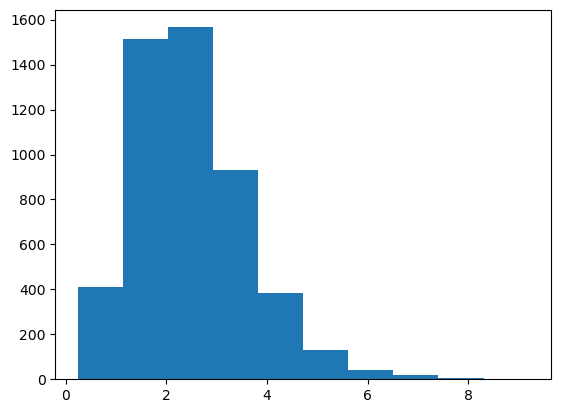

In [20]:
# gamma distribution - composition method

def gen_gamma(a,b):
    X = 0 # initialize sum of gamma rv to 0
    for _ in range(a):
        X += np.random.exponential(1/b)
    return X

a = 5
b = 2
samples = 5000
gamma_random_vars = [gen_gamma(a,b) for _ in range(samples)]
plt.hist(gamma_random_vars); plt.show()